# 06. e-mail report

## SMTP (smtplib)

In [1]:
html_report_body=u"""<html>
<head>
<title>[Weblog-FDS] Report</title>
<style type="text/css">
body { 
    font-family:'Malgun Gothic'; 
    font-size:10pt; 
}
</style>
</head><body>
Hello, 안녕하세요, こんにちは<br/>
메시지의 본문 #1<br />
<p><img src="cid:image0001.png" /></p>
메시지의 본문 #2<br />
</body>
</html>
"""

In [2]:
import os, smtplib
from email.header import Header
from email.mime.multipart import MIMEMultipart
from email.mime.image import MIMEImage
from email.mime.text import MIMEText

gmail_fname='Weblog Analytics Bot'  # face name
gmail_user='gmail_account@gmail.com' # gmail account
gmail_pwd='[gmail_account_pwd]'  # gmail account passwd

def send_gmail(to, subject, html_body, attach):
    msg = MIMEMultipart(_subtype='related')
    msg['From']='"%s"<%s>' % (gmail_fname, gmail_user)
    msg['To']=to
    msg['Subject'] = Header(s=subject, charset="utf-8")
 
    # attach body
    body = MIMEText(html_body, _subtype='html')
    msg.attach(body)

    # attach image
    img_data = open('images/dog.jpg', 'rb').read()
    img = MIMEImage(img_data, 'jpeg')
    img.add_header('Content-Id', '<image0001.png>')
    msg.attach(img)
   
    # send
    server = smtplib.SMTP("smtp.gmail.com",587)
    #server.set_debuglevel(1) # SMTP debug level
    server.ehlo()
    server.starttls()
    server.ehlo()
    server.login(gmail_user,gmail_pwd)
    server.sendmail(gmail_user, to, msg.as_string())
    server.close()

In [3]:
title = '[Weblog-FDS] Report'
to = '"이승준" <plusjune@gmail.com>, "이승준" <plusjune@kbsec.co.kr>'

send_gmail(to, title, html_report_body.encode('utf-8'), None)

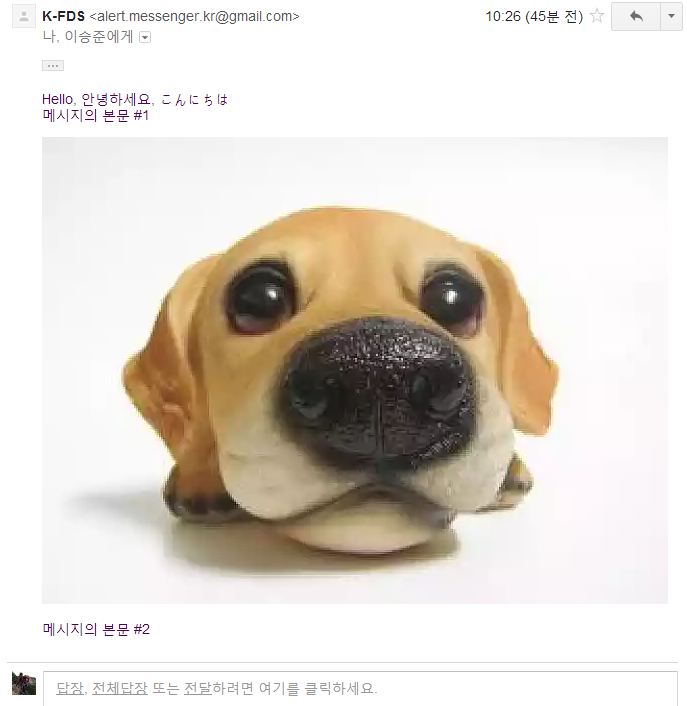

In [4]:
from IPython.display import Image
Image(filename='images/report.png')